<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Random Forest Regression with Robustscaler

This Code template is for regression analysis using a RandomForestRegressor based on the Ensemble Learning technique using feature scaling via RobustScaler

### Required Packages

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features=[]

Target variable for prediction.

In [4]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

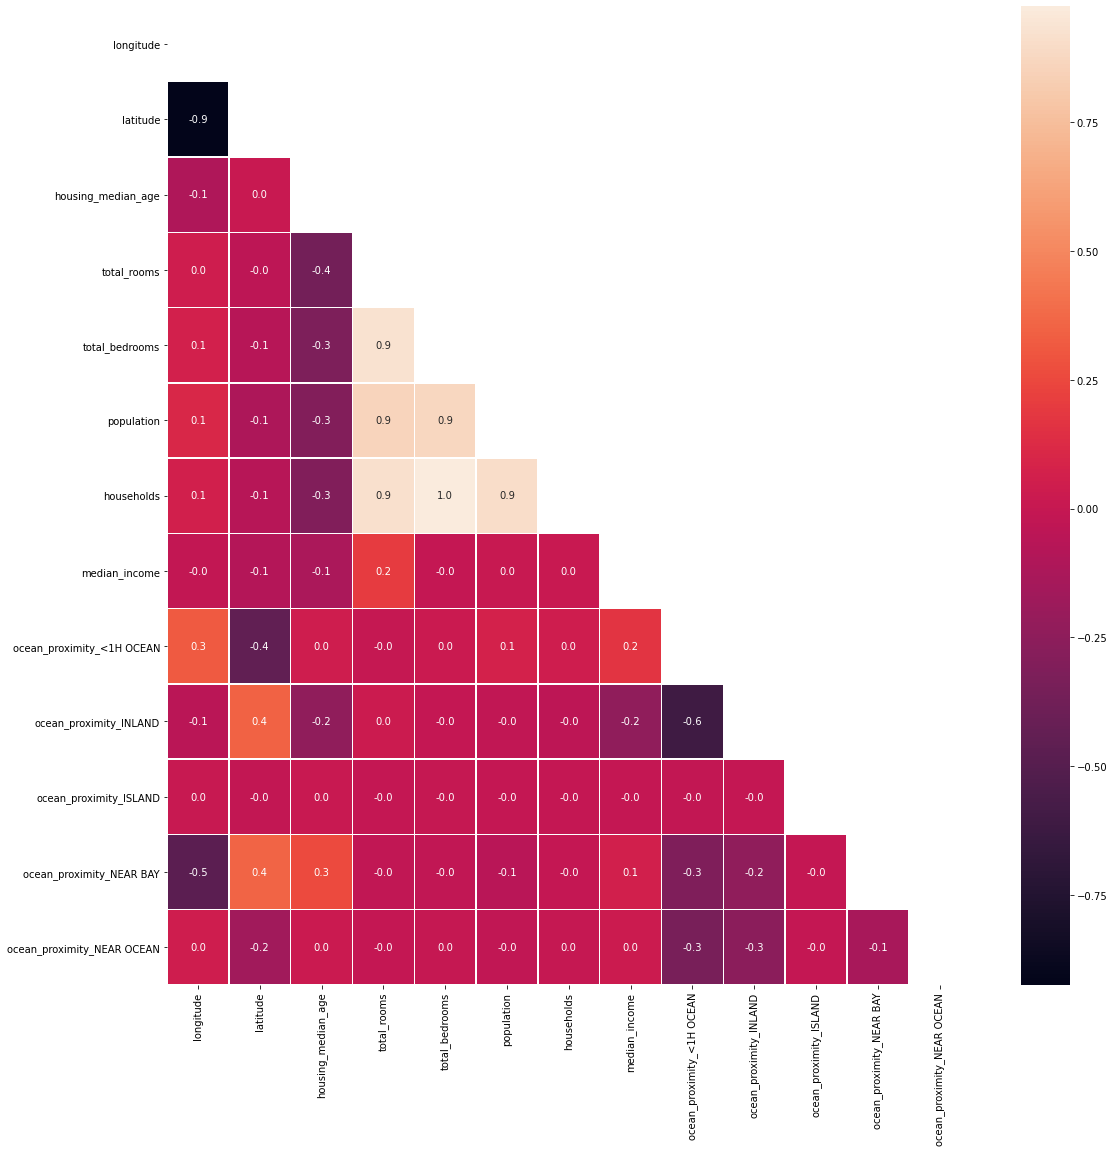

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

### Data Rescaling

RobustScaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).

We will fit an object of RobustScaler to **train data** then transform the same data via <Code>fit_transform(X_train)</Code> method, following which we will transform **test data** via <Code>transform(X_test)</Code> method.

In [11]:
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

### Model

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the <code>max_samples</code> parameter if <code>bootstrap=True</code> (default), otherwise the whole dataset is used to build each tree.

#### Model Tuning Parameters

    1. n_estimators : int, default=100
> The number of trees in the forest.

    2. criterion : {“mae, “mse}, default=mse
> The function to measure the quality of a split. Supported criteria are “mse for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae for the mean absolute error.

    3. max_depth : int, default=None
> The maximum depth of the tree.

    4. max_features : {“auto, “sqrt, “log2}, int or float, default=auto
> The number of features to consider when looking for the best split:


    5. bootstrap : bool, default=True
> Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

    6. oob_score : bool, default=False
> Whether to use out-of-bag samples to estimate the generalization accuracy.

    7. n_jobs : int, default=None
> The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. <code>None</code> means 1 unless in a joblib.parallel_backend context. <code>-1</code> means using all processors. See Glossary for more details.

    8. random_state : int, RandomState instance or None, default=None
> Controls both the randomness of the bootstrapping of the samples used when building trees (if <code>bootstrap=True</code>) and the sampling of the features to consider when looking for the best split at each node (if <code>max_features < n_features</code>).

    9. verbose : int, default=0
> Controls the verbosity when fitting and predicting.


In [12]:
model = RandomForestRegressor(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

> **score**: The **score** function returns the coefficient of determination <code>R<sup>2</sup></code> of the prediction.

In [13]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 83.12 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [14]:
y_pred=model.predict(X_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 83.12 %
Mean Absolute Error 30914.15
Mean Squared Error 2244234119.03


#### Feature Importances

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.

(-1.0, 13.0)

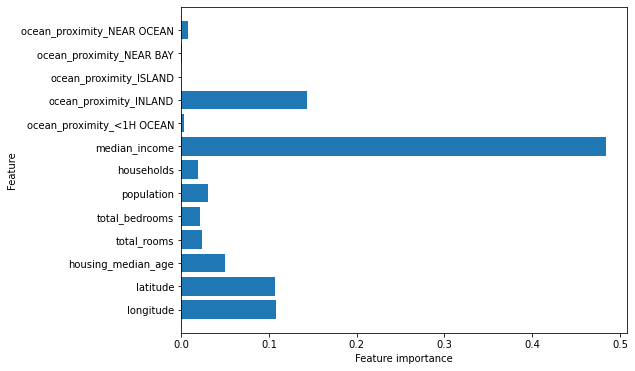

In [15]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

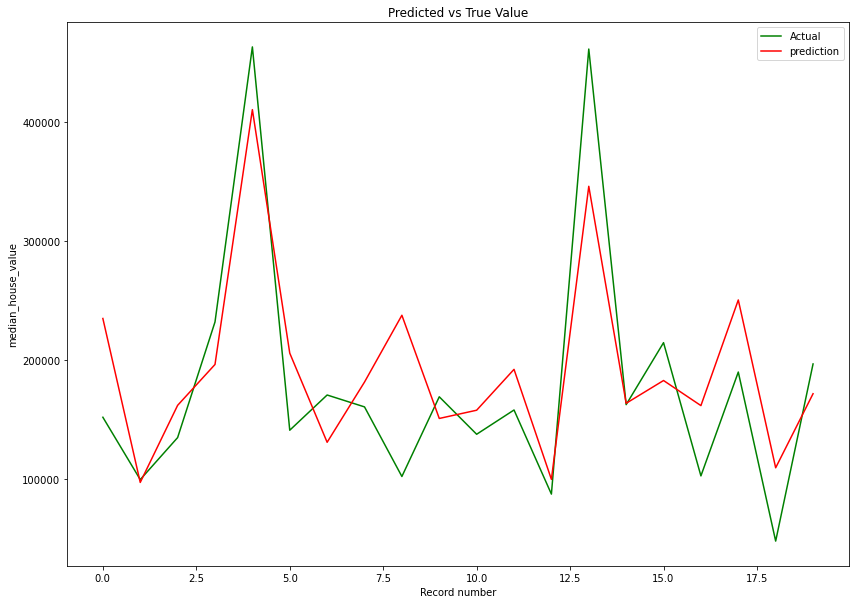

In [16]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Viraj Jayant, Github: [Profile](https://github.com/Viraj-Jayant)
